### RUN ALL THE CELLS AND DON'T EDIT ANY CELL

### CODE IN THE MENTIONED CELLS ONLY

# Import Necessary Files

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cartoon = cv2.imread("/content/images/cartoon.bmp")
cartoon_y = cv2.imread("/content/images/cartoon_y.jpg")
girl = cv2.imread("/content/images/girl.png") #grayscale image
girl_y = cv2.imread("/content/images/girl_y.jpg")
fingerprint = cv2.imread("/content/images/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/images/fingerprint_y.jpg")

# Raw and Final Image
You need to process the raw images: cartoon, girl, fingerprint to get the processed images: cartoon_y, girl_y, fingerprint_y

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.


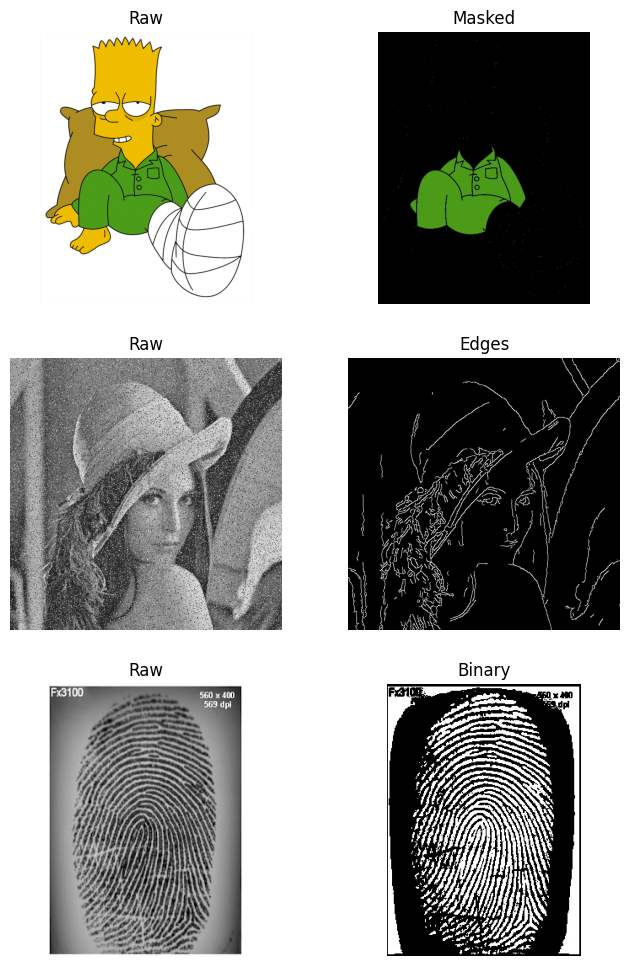

In [3]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

# Code in the following 3 cells only
### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in cartoon_y_mentee variable only or it'll show error later.

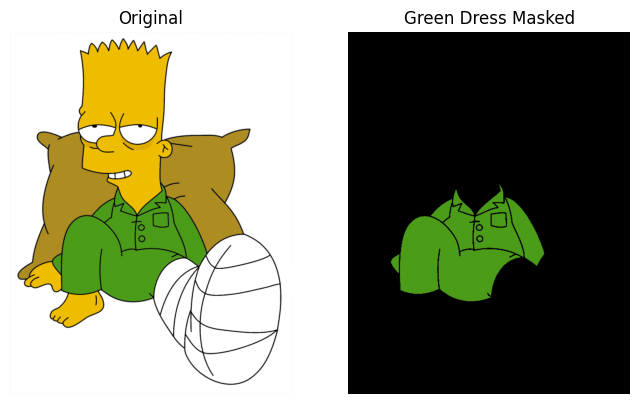

In [41]:
cartoon = cv2.imread('/content/images/cartoon.bmp')      # Load the Bart image

cartoon_rgb = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)     # Convert the image to RGB

hsv = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)             # Convert the image to HSV (Hue, Saturation, Value) color space

# Define the color range for the green dress in HSV
# Adjust these values based on the actual color of the dress
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

mask = cv2.inRange(hsv, lower_green, upper_green)           # Create a mask for the green dress

green_region = cv2.bitwise_and(cartoon_rgb, cartoon_rgb, mask=mask)     # Apply the mask to retain only the green region

# Set the rest of the image to black
cartoon_y_mentee = np.zeros_like(cartoon_rgb)
cartoon_y_mentee[mask > 0] = green_region[mask > 0]

# Display the results
fig, axs = plt.subplots(1, 2, figsize=(8,6))
axs[0].imshow(cartoon_rgb)
axs[0].axis("off")
axs[0].set_title("Original")

axs[1].imshow(cartoon_y_mentee)
axs[1].axis("off")
axs[1].set_title("Green Dress Masked")

plt.show()


### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in girl_y_mentee variable only or it'll show error later.

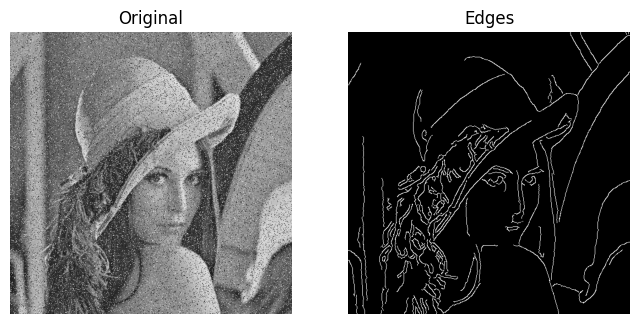

In [42]:
girl = cv2.imread('/content/images/girl.png')  # Load the girl image (make sure the path is correct)

gray_girl = cv2.cvtColor(girl, cv2.COLOR_BGR2GRAY)          # Convert the image to grayscale

median_blur_girl = cv2.medianBlur(gray_girl, 5)            # Apply median blur to reduce salt-and-pepper noise

blurred_girl = cv2.GaussianBlur(median_blur_girl, (7, 7), 1.5)            # Apply Gaussian blur to further reduce noise

edges = cv2.Canny(blurred_girl, threshold1=30, threshold2=100)             # Apply the Canny edge detection with adjusted parameters

girl_y_mentee = edges                                                      # Store the final processed image in girl_y_mentee

# Display the results
fig, axs = plt.subplots(1, 2, figsize=(8,6))
axs[0].imshow(cv2.cvtColor(girl, cv2.COLOR_BGR2RGB))
axs[0].axis("off")
axs[0].set_title("Original")

axs[1].imshow(girl_y_mentee, cmap='gray')
axs[1].axis("off")
axs[1].set_title("Edges")

plt.show()


### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in cartoon_y_mentee variable only or it'll show error later.



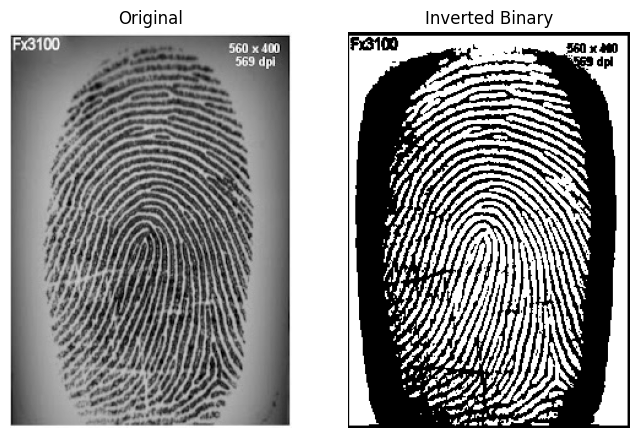

In [40]:
import cv2
import matplotlib.pyplot as plt

# Load the fingerprint image (make sure the path is correct)
fingerprint = cv2.imread('/content/images/fingerprint.jpg', cv2.IMREAD_GRAYSCALE)  # Load in grayscale

# Apply Otsu's thresholding to convert the image to binary
_, fingerprint_y_mentee = cv2.threshold(fingerprint, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invert the binary image
fingerprint_y_mentee = 255 - fingerprint_y_mentee

# Display the results
fig, axs = plt.subplots(1, 2, figsize=(8,6))
axs[0].imshow(fingerprint, cmap='gray')
axs[0].axis("off")
axs[0].set_title("Original")

axs[1].imshow(fingerprint_y_mentee, cmap='gray')
axs[1].axis("off")
axs[1].set_title("Inverted Binary")

plt.show()
